**Voice Gender**

**Gender Recognition by Voice and Speech Analysis**

This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of 3,168 recorded voice samples, collected from male and female speakers. The voice samples are pre-processed by acoustic analysis in R using the seewave and tuneR packages, with an analyzed frequency range of 0hz-280hz (human vocal range).

The Dataset
The following acoustic properties of each voice are measured and included within the CSV:

* meanfreq: mean frequency (in kHz)
* sd: standard deviation of frequency
* median: median frequency (in kHz)
* Q25: first quantile (in kHz)
* Q75: third quantile (in kHz)
* IQR: interquantile range (in kHz)
* skew: skewness (see note in specprop description)
* kurt: kurtosis (see note in specprop description)
* sp.ent: spectral entropy
* sfm: spectral flatness
* mode: mode frequency
* centroid: frequency centroid (see specprop)
* peakf: peak frequency (frequency with highest energy)
* meanfun: average of fundamental frequency measured across acoustic signal
* minfun: minimum fundamental frequency measured across acoustic signal
* maxfun: maximum fundamental frequency measured across acoustic signal
* meandom: average of dominant frequency measured across acoustic signal
* mindom: minimum of dominant frequency measured across acoustic signal
* maxdom: maximum of dominant frequency measured across acoustic signal
* dfrange: range of dominant frequency measured across acoustic signal
* modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range
* label: male or female

### Importamos el archivo y las librerias que vamos a utilizar:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("voice.csv")


### Observamos las primeras filas del dataframe para conocer los datos:

In [2]:
df.head(5)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


*** Miramos las distintas columnas: ***

In [3]:
df.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

***Al haber obtenido el df de kaggle, se encuentra limpio, por ende no debemos realizar ninguna limpieza previa***

In [4]:
df.info()
#No hay registros nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.8+ KB


***Transformamos nuestra etiqueta male/female en una variable binaria 1/0***

In [5]:
#Nuestro target
df['label'].head()

0    male
1    male
2    male
3    male
4    male
Name: label, dtype: object

In [6]:
#Lo convierto en binario
df['label'] = np.where(df['label']== 'male', 1, 0)

In [7]:
df['label'].unique()

array([1, 0], dtype=int64)

#### Observamos que ambas etiquetas tienen el mismo peso dentro del df

In [8]:
print("Cantidad de muestras: {}".format(df.shape[0]))
print("Cantidad de voces masculinas: {}".format(df[df['label'] == 1].shape[0]))
print("Cantidad de voces femeninas: {}".format(df[df['label'] == 0].shape[0]))



Cantidad de muestras: 3168
Cantidad de voces masculinas: 1584
Cantidad de voces femeninas: 1584


### A traves de la visualizacion buscamos aquellos features que se encuentran mas correlacionados:

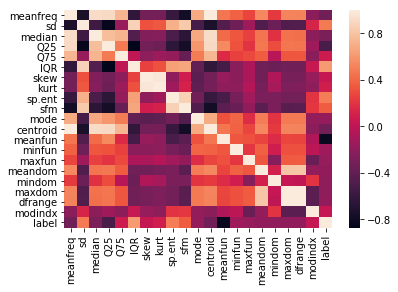

In [9]:
sns.heatmap(df.corr())

### Observamos las distintas distribuciones de los features:

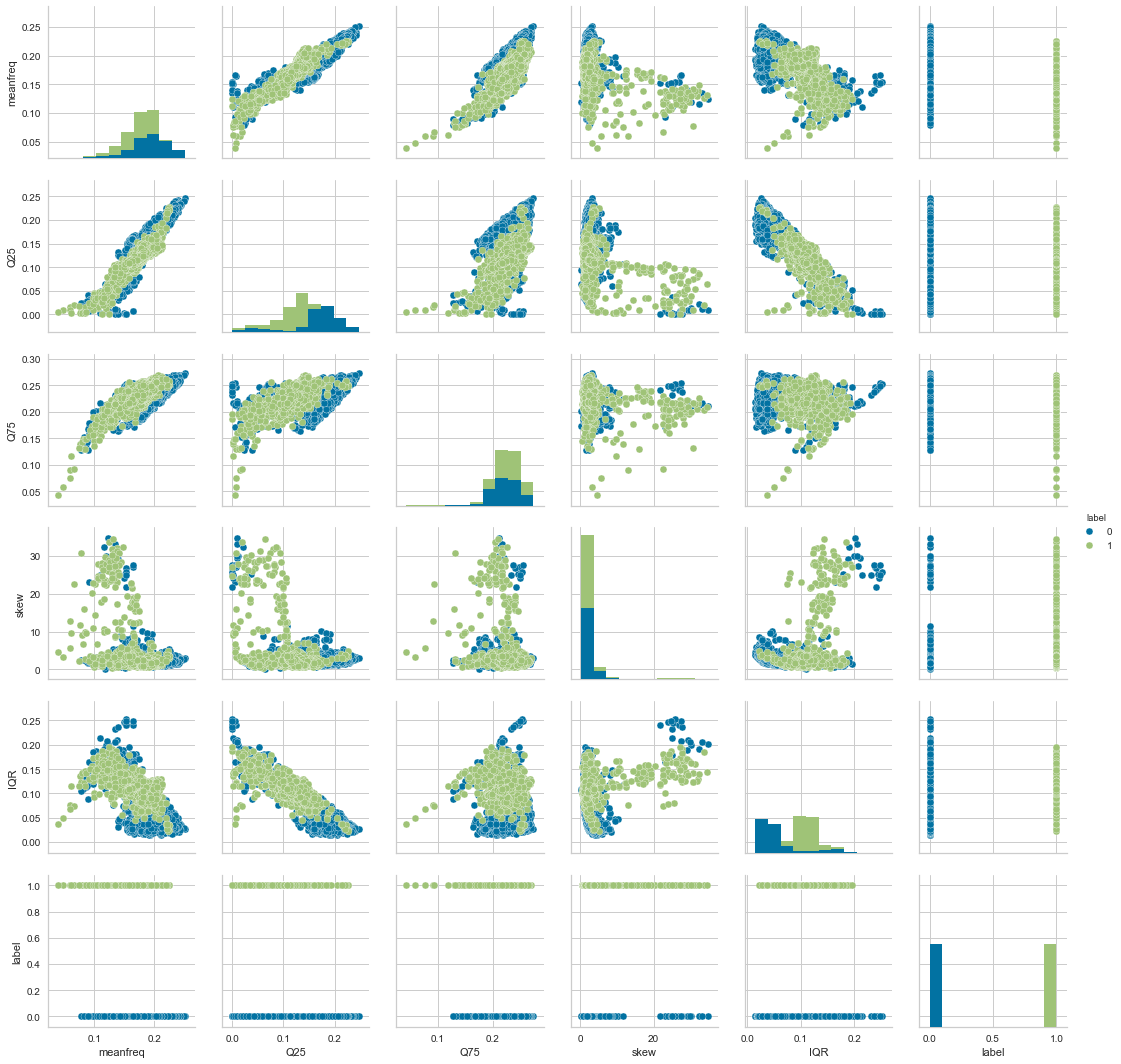

In [46]:
sns.pairplot(df[['meanfreq', 'Q25', 'Q75', 'skew', 'IQR', 'label']], 
                 hue='label')

** Identificando X e Y**

In [11]:
y = df['label'].values
x = df.drop(['label'],axis=1)

### Normalizamos las variables para poder obtener una mejor prediccion con las distintas regresiones:

In [12]:

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

### Separamos el conjunto de entrenamiento y el de testeo para poder luego realizar las predicciones:

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 42)
method_scores=[]
method_names=[]


** KNN MÉTODO**

Score: 0.973186119873817


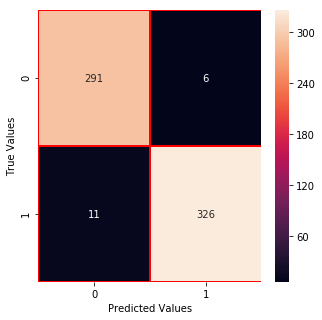

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
print("Score: {}".format(knn.score(x_test,y_test)))
method_names.append("KNN")
method_scores.append(knn.score(x_test,y_test))

#Confusion Matrix
y_pred = knn.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

Text(0,0.5,'score')

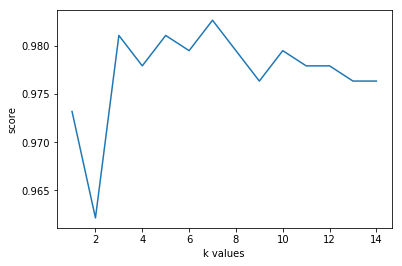

In [15]:
score_list=[]
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors=each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))

plt.plot(range(1,15),score_list)
plt.xlabel("k values")
plt.ylabel("score")

KNN Method Score: 0.9826498422712934


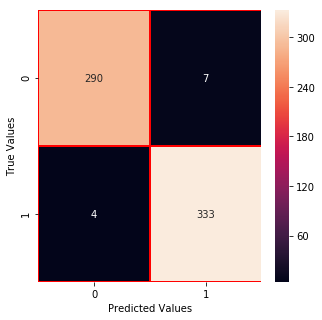

In [16]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
print("KNN Method Score: {}".format(knn.score(x_test,y_test)))

#Confusion Matrix
y_pred = knn.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

**REGRESIÓN LOGÍSTICA**

Logistic Regression Score 0.9810725552050473


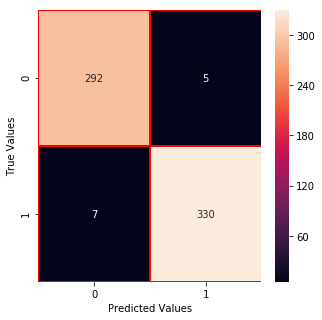

In [17]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train) #Fitting
print("Logistic Regression Score {}".format(log_reg.score(x_test,y_test)))
method_names.append("Logistic Reg.")
method_scores.append(log_reg.score(x_test,y_test))

#Confusion Matrix
y_pred = log_reg.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

**BAYES**

Naive Bayes Score: 0.8785488958990536


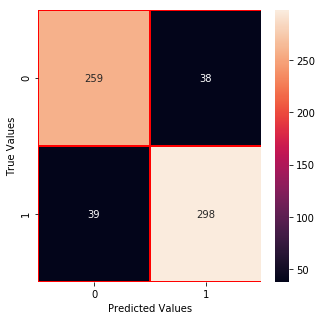

In [18]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(x_test,y_test)
print("Naive Bayes Score: {}".format(naive_bayes.score(x_test,y_test)))
method_names.append("Naive Bayes")
method_scores.append(naive_bayes.score(x_test,y_test))

#Confusion Matrix
y_pred = naive_bayes.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

In [19]:
features = ['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx']
    
classes = ["men",'women']

z = df[features]
c = df.label

C:\Users\agusf\Anaconda3\lib\site-packages\yellowbrick\features\pcoords.py:344: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()
C:\Users\agusf\Anaconda3\lib\site-packages\yellowbrick\features\pcoords.py:346: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  y = y.as_matrix()


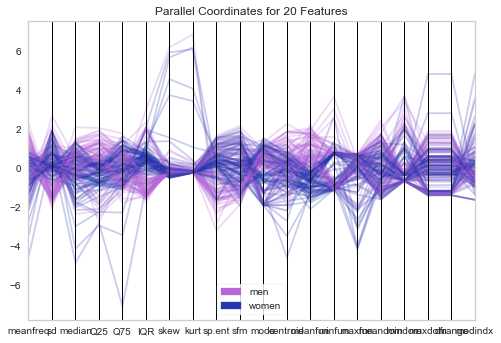

In [20]:
from yellowbrick.features import ParallelCoordinates

# Instantiate the visualizer
visualizer = ParallelCoordinates(
    classes=classes, features=features,
    normalize='standard', sample=0.05, shuffle=True,color=('#b867db','#2636af')
)

# Fit the visualizer and display it
visualizer.fit_transform(z, c)
visualizer.poof()

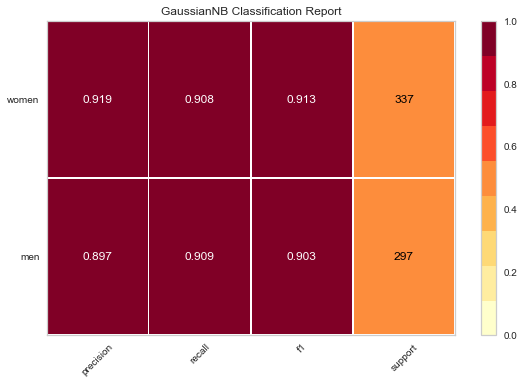

In [21]:
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ClassificationReport


bayes = GaussianNB()
visualizer = ClassificationReport(bayes, classes=classes, support=True)

visualizer.fit(x_train, y_train)  
visualizer.score(x_test, y_test)  
g = visualizer.poof()             

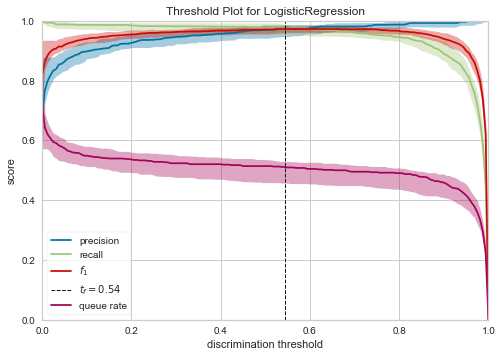

In [22]:
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import DiscriminationThreshold


logistic = LogisticRegression()
visualizer = DiscriminationThreshold(logistic)

visualizer.fit(x, y)  
visualizer.poof()     

In [23]:
from sklearn.linear_model import LogisticRegression
log_reg2 = LogisticRegression()
log_reg2.fit(x_train,y_train) #Fitting
print("Logistic Regression Score {}".format(log_reg.score(x_test,y_test)))






Logistic Regression Score 0.9810725552050473


In [24]:
y_probs_logit = log_reg2.predict_proba(x_test)
y_probs_logit_left = y_probs_logit[:,1]

In [25]:
from sklearn.preprocessing import binarize
y_pred_logit = binarize(y_probs_logit, 0.68)[:,1]

In [26]:
y_pred_orig = log_reg.predict(x_test)

confusion_matrix(y_test,y_pred_orig)


array([[292,   5],
       [  7, 330]], dtype=int64)

In [27]:
confusion_matrix(y_test,y_pred_logit)

array([[295,   2],
       [ 15, 322]], dtype=int64)

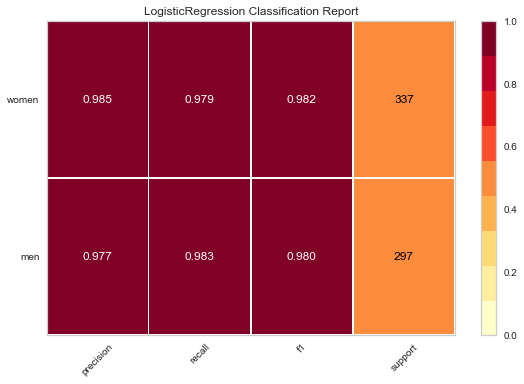

In [28]:
logis = LogisticRegression()
visualizer = ClassificationReport(logis, classes=classes, support=True)

visualizer.fit(x_train, y_train)  
visualizer.score(x_test, y_test)  
g = visualizer.poof()           

### Esta herramienta de yellowbrick determina cuales son los features mas importantes:

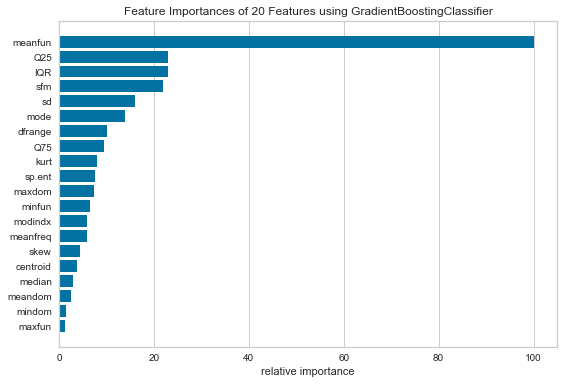

In [29]:
#Determina cuales son los features mas importantes

import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingClassifier

from yellowbrick.features.importances import FeatureImportances


fig = plt.figure()
ax = fig.add_subplot()

viz = FeatureImportances(GradientBoostingClassifier(), ax=ax)
viz.fit(z, c)
viz.poof()

In [52]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification

from yellowbrick.features import RFECV
from tqdm import tqdm

# Create a dataset with only 3 informative features
#X, y = make_classification(
#n_samples=1000, n_features=25, n_informative=3, n_redundant=2,
#n_repeated=0, n_classes=8, n_clusters_per_class=1, random_state=0)

# Create RFECV visualizer with linear SVM classifier
#viz = RFECV(SVC(kernel='linear', C=1))
#viz.fit(z, c)
#viz.poof()

### Support vector machine:

In [31]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear',gamma=0.000001)  
svclassifier.fit(x_train, y_train)  


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1e-06, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix  
y_pred = svclassifier.predict(x_test)  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  

[[293   4]
 [ 11 326]]
             precision    recall  f1-score   support

          0       0.96      0.99      0.98       297
          1       0.99      0.97      0.98       337

avg / total       0.98      0.98      0.98       634



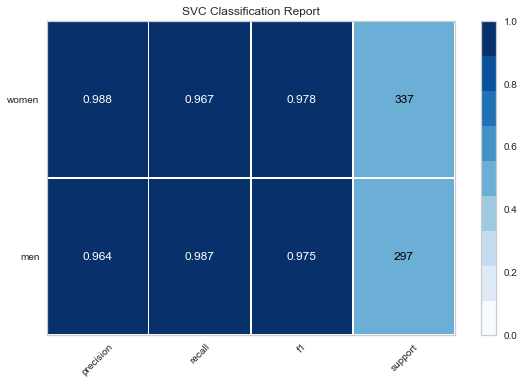

In [103]:
visualizer = ClassificationReport(svclassifier, classes=classes, support=True, cmap='Blues')

visualizer.fit(x_train, y_train)  
visualizer.score(x_test, y_test)  
g = visualizer.poof() 

In [35]:
from sklearn.svm import SVC  
svclassifier1 = SVC(kernel='rbf')  
svclassifier1.fit(x_train, y_train)  

y_pred1=svclassifier1.predict(x_test)

In [36]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred1))  
print(classification_report(y_test,y_pred1))  

[[293   4]
 [  7 330]]
             precision    recall  f1-score   support

          0       0.98      0.99      0.98       297
          1       0.99      0.98      0.98       337

avg / total       0.98      0.98      0.98       634



### Realizamos random grid search para encontrar los mejores hiperparametros C y GAMMA para nuestro svm:

In [44]:

rand_list = {"C": stats.uniform(2, 1000),
             "gamma": stats.uniform(0.01, 10)}
              


random = RandomizedSearchCV(svclassifier1, param_distributions = rand_list, n_iter = 300, n_jobs = 4, cv=5, scoring='accuracy')

random.fit(x_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          fit_params=None, iid=True, n_iter=300, n_jobs=4,
          param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001EA99171898>, 'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001EA989C2F28>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=0)

In [40]:
random.best_estimator_, random.best_score_, random.best_params_

(SVC(C=2.8474138262723874, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma=0.12439769523799185,
   kernel='rbf', max_iter=-1, probability=False, random_state=None,
   shrinking=True, tol=0.001, verbose=False),
 0.9818468823993686,
 {'C': 2.8474138262723874, 'gamma': 0.12439769523799185})

In [47]:
y_pred2 = random.predict(x_test)
print(classification_report(y_test, y_pred2))

             precision    recall  f1-score   support

          0       0.97      0.99      0.98       297
          1       0.99      0.97      0.98       337

avg / total       0.98      0.98      0.98       634



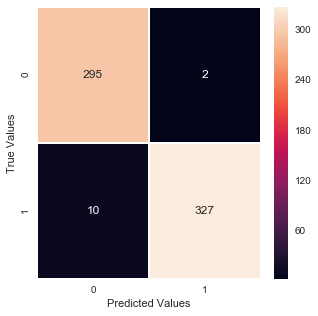

In [49]:
## Confusion Matrix
y_pred = knn.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred2)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="white",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

In [59]:
rand_list2 = {"C": stats.uniform(2, 1000)}
              


random2 = RandomizedSearchCV(log_reg, param_distributions = rand_list2, n_iter = 300, n_jobs = 4, cv=5, scoring='accuracy')

random2.fit(x_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=300, n_jobs=4,
          param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001EA9C4F1CF8>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=0)

In [60]:
y_pred2 = random2.predict(x_test)
print(classification_report(y_test, y_pred2))

             precision    recall  f1-score   support

          0       0.97      0.98      0.98       297
          1       0.99      0.98      0.98       337

avg / total       0.98      0.98      0.98       634



In [67]:
features2 = ['Q25',  'IQR','sfm',  'meanfun']
    
classes = ["men",'women']

x2 = df[features2]
y2 = df.label

In [68]:
from sklearn.model_selection import train_test_split
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2,test_size=0.2,random_state = 42)

In [69]:
rand_list3 = {"C": stats.uniform(2, 1000)}
              


random3 = RandomizedSearchCV(log_reg, param_distributions = rand_list2, n_iter = 300, n_jobs = 4, cv=5, scoring='accuracy')

random3.fit(x2_train, y2_train)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=300, n_jobs=4,
          param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001EA9C4F1CF8>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=0)

In [107]:
 random3.best_params_

{'C': 905.7017454656811}

In [70]:
y_pred3 = random3.predict(x2_test)
print(classification_report(y2_test, y_pred3))

             precision    recall  f1-score   support

          0       0.97      0.98      0.97       297
          1       0.98      0.97      0.98       337

avg / total       0.97      0.97      0.97       634



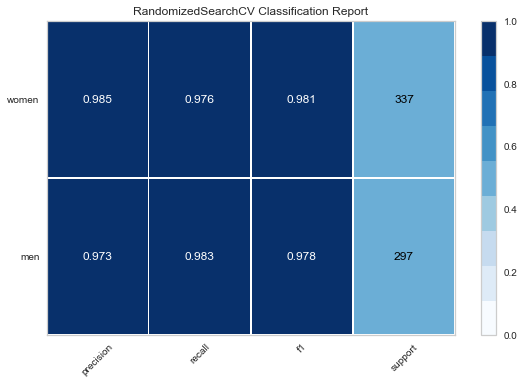

In [76]:
visualizer = ClassificationReport(random2, classes=classes, support=True, cmap='Blues')

visualizer.fit(x_train, y_train)  
visualizer.score(x_test, y_test)  
g = visualizer.poof()   

In [97]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6, svd_solver='randomized')
    
pca.fit(x_train)
projected = pca.fit_transform(x_train)
print(x_train.shape)
print(projected.shape)

(2534, 20)
(2534, 6)


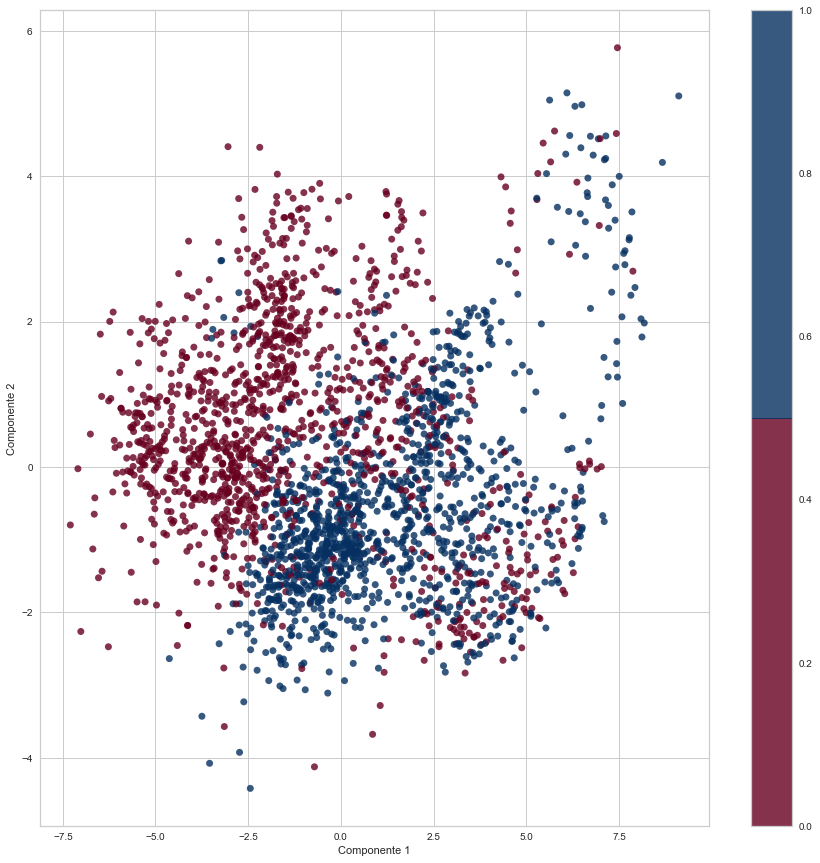

In [102]:
plt.figure(figsize=(15,15))

plt.scatter(projected[:, 0], projected[:, 1],
            c=y_train, edgecolor='none', alpha=0.8,
            cmap=plt.cm.get_cmap('RdBu',2))

plt.xlabel('Componente 1')
plt.ylabel('Componente 2')


plt.colorbar();

C:\Users\agusf\Anaconda3\lib\site-packages\yellowbrick\features\pcoords.py:344: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()
C:\Users\agusf\Anaconda3\lib\site-packages\yellowbrick\features\pcoords.py:346: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  y = y.as_matrix()


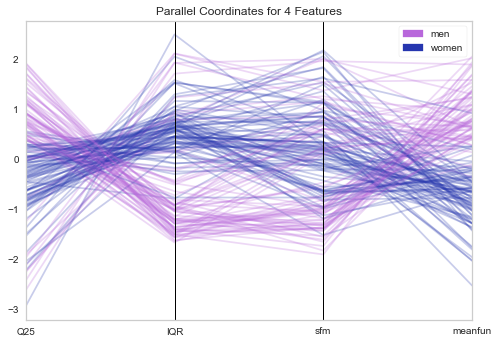

In [105]:
from yellowbrick.features import ParallelCoordinates

# Instantiate the visualizer
visualizer = ParallelCoordinates(
    classes=classes, features=features2,
    normalize='standard', sample=0.05, shuffle=True,color=('#b867db','#2636af')
)

# Fit the visualizer and display it
visualizer.fit_transform(x2, y2)
visualizer.poof()